## Import bibliotek 

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from mlp import * 
from mlp2 import * 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


## Ładowanie danych 

In [44]:
X = pd.read_csv('input_data.csv', header=None)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.325311,0.355525,0.397343,0.284162,0.408696,0.853002,0.481582,0.365663,0.624396,0.630032,0.277494,0.135749,0.222464,0.361413,0.302174,0.125000
1,0.322621,0.348229,0.426276,0.285427,0.404809,0.853958,0.480490,0.371696,0.617918,0.633816,0.280904,0.128623,0.246894,0.367754,0.316667,0.098551
2,0.323370,0.346121,0.439242,0.280596,0.405495,0.853002,0.486542,0.363872,0.619163,0.627599,0.288647,0.135393,0.229469,0.358696,0.306612,0.102355
3,0.324827,0.342754,0.432174,0.276641,0.405217,0.853002,0.482163,0.361514,0.614332,0.630120,0.285507,0.131550,0.230490,0.365942,0.317391,0.111111
4,0.325362,0.347497,0.439538,0.283126,0.416476,0.852484,0.486473,0.361660,0.616667,0.628909,0.288768,0.127415,0.240777,0.362319,0.304865,0.112319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.481509,0.476449,0.774155,0.432806,0.699946,0.462932,0.411232,0.545609,0.719298,0.674450,0.222117,0.091568,0.449275,0.448370,0.616848,0.262940
2156,0.479260,0.475544,0.776168,0.425983,0.699728,0.464326,0.411594,0.548834,0.719063,0.672464,0.216701,0.094518,0.451389,0.450080,0.582609,0.264895
2157,0.479227,0.475500,0.774289,0.428195,0.699748,0.461792,0.410870,0.545743,0.719697,0.674258,0.217391,0.091568,0.448161,0.450242,0.600687,0.262480
2158,0.476354,0.475456,0.776765,0.428166,0.700241,0.466403,0.412591,0.549052,0.721532,0.673333,0.226248,0.093599,0.447826,0.448718,0.598732,0.261905


In [45]:
Y = pd.read_csv('target_data.csv', header=None)
Y = Y[[0,1]]  # usunięcię ostatniej kolumny odpowiadającej pozycji Z, gdyż była ona nieistotna dla omawianego problemu
Y

,0,1
0,0.156728,-0.070469
1,0.156728,-0.070469
2,0.156728,-0.070469
3,0.156728,-0.070469
4,0.156728,-0.070469
...,...,...
2155,0.044988,-0.004482
2156,0.044988,-0.004482
2157,0.044988,-0.004482
2158,0.044988,-0.004482


In [46]:
X.shape, Y.shape

((2160, 16), (2160, 2))

C:\Users\aleks\AppData\Local\Temp\ipykernel_38592\3696149823.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


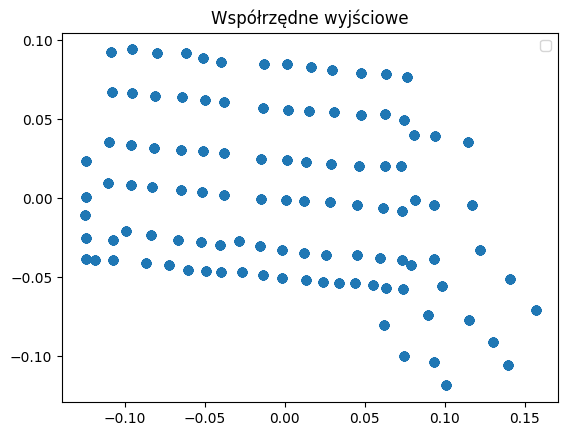

In [47]:
plt.scatter(Y[0], Y[1])
# plt.scatter(Y[0][0], Y[1][0], color='red', label="Pierwszy punkt", zorder=5)
# plt.scatter(Y[0][2159], Y[1][2159], color='green', label="Ostatni punkt", zorder=5)
plt.title('Współrzędne wyjściowe')
plt.legend()

# Tworzenie sieci + wybór hiperparametrów

K KROTNA WALIDACJA 

In [48]:
num_epoch = 10000
lr = 0.01
momentum = 0
activation_func=sigmoid 
activation_derivative=sigmoid_derivative
X = np.array(X)
Y = np.array(Y)

In [49]:
def kfold_func(X, Y, mlp_class, num_epoch, lr, momentum, input_layer, hidden_layer, output_layer, hidden_layer2=None):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  
    X = np.array(X)
    Y = np.array(Y)

    mse_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        MLP = mlp_class(num_epoch=num_epoch, learning_rate=lr, momentum=momentum, input_layer=input_layer,
                 hidden_layer=hidden_layer, output_layer=output_layer)
        MLP.train(X_train, y_train)
        y_pred = MLP.predict(X_test)

            # Obliczamy MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    return np.round(mse_scores,6), np.round(np.mean(mse_scores),6)

# Architektura sieci

 16 -> 4 -> 2

In [50]:
INPUT_LAYER = 16
HIDDEN_LAYER = 4
OUTPUT_LAYER = 2

In [51]:
tab1, err1 = kfold_func(X, Y, MLP_momentum, num_epoch, lr, momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER)

16 -> 8 -> 2

In [52]:
INPUT_LAYER = 16
HIDDEN_LAYER = 8
OUTPUT_LAYER = 2

In [53]:
tab2, err2 = kfold_func(X, Y, MLP_momentum, num_epoch, lr, momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER)

16 -> 10 -> 2 

In [54]:
INPUT_LAYER = 16
HIDDEN_LAYER = 10
OUTPUT_LAYER = 2

In [55]:
tab3, err3 = kfold_func(X, Y, MLP_momentum, num_epoch, lr, momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER)

16 -> 8 -> 4 -> 2

In [56]:
INPUT_LAYER = 16
HIDDEN_LAYER = 8
HIDDEN_LAYER2 = 4
OUTPUT_LAYER = 2

In [57]:
tab4, err4 = kfold_func(X, Y, MLP_momentum2, num_epoch, lr, momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)

16 -> 10 -> 8 -> 2

In [58]:
INPUT_LAYER = 16
HIDDEN_LAYER = 10
HIDDEN_LAYER2 = 8
OUTPUT_LAYER = 2

In [59]:
tab5, err5 = kfold_func(X, Y, MLP_momentum2, num_epoch, lr, momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)

In [60]:
dic = {'16-4-2': tab1, '16-8-2': tab2, '16-10-2':tab3, '16-8-4-2':tab4, '16-10-8-2': tab5}
df_err = pd.DataFrame(dic)
df_err.loc[5] = [err1, err2, err3, err4, err5]
df_err

,16-4-2,16-8-2,16-10-2,16-8-4-2,16-10-8-2
0,0.003391,0.002407,0.001643,0.002173,0.003170
1,0.002637,0.002278,0.001768,0.002006,0.002737
2,0.003515,0.002322,0.001699,0.002356,0.003107
3,0.003220,0.002376,0.001802,0.002239,0.003146
4,0.002981,0.002097,0.001941,0.002039,0.002880
5,0.003149,0.002296,0.001770,0.002163,0.003008


Po k krotnej walidacji okazuję się, że najlepszy wynik osiąga architektura 16-10-2

In [61]:
INPUT_LAYER = 16
HIDDEN_LAYER = 10
OUTPUT_LAYER = 2

# Learning rate

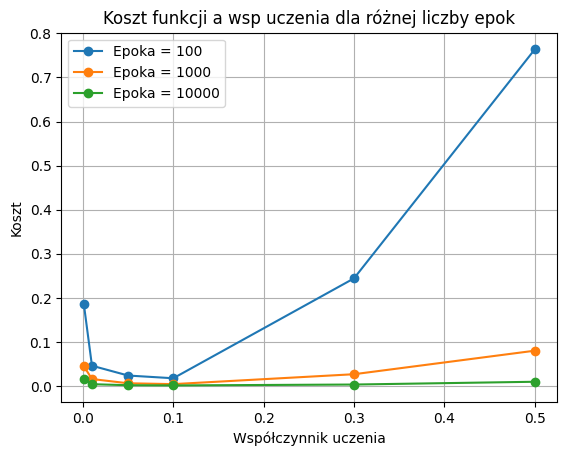

In [62]:
cost_per_lr(X=X,Y=Y, m=momentum, input_layer=16, hidden_layer=10, output_layer=2)

In [63]:
lr_list = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5]
tab0, err0 = kfold_func(X, Y, MLP_momentum, num_epoch, lr_list[0], momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)
tab1, err1 = kfold_func(X, Y, MLP_momentum, num_epoch, lr_list[1], momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)
tab2, err2 = kfold_func(X, Y, MLP_momentum, num_epoch, lr_list[2], momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)
tab3, err3 = kfold_func(X, Y, MLP_momentum, num_epoch, lr_list[3], momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)
tab4, err4 = kfold_func(X, Y, MLP_momentum, num_epoch, lr_list[4], momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)
tab5, err5 = kfold_func(X, Y, MLP_momentum, num_epoch, lr_list[5], momentum, INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)

dic_lr = {'0.001': tab0, '0.01': tab1, '0.05':tab2, '0.1': tab3, '0.3': tab4, '0.5': tab5}
df_err_lr = pd.DataFrame(dic_lr)
df_err_lr.loc[5] = [err0, err1, err2, err3, err4, err5]
df_err_lr

,0.001,0.01,0.05,0.1,0.3,0.5
0,0.006578,0.001643,0.000906,0.000702,0.000522,0.001499
1,0.006619,0.001768,0.000934,0.000732,0.000556,0.001446
2,0.006501,0.001699,0.000862,0.000658,0.000497,0.001370
3,0.007299,0.001802,0.000923,0.000710,0.000522,0.001457
4,0.007184,0.001941,0.000972,0.000736,0.000528,0.001461
5,0.006836,0.001770,0.000919,0.000708,0.000525,0.001447


In [64]:
lr = 0.3

# Momentum

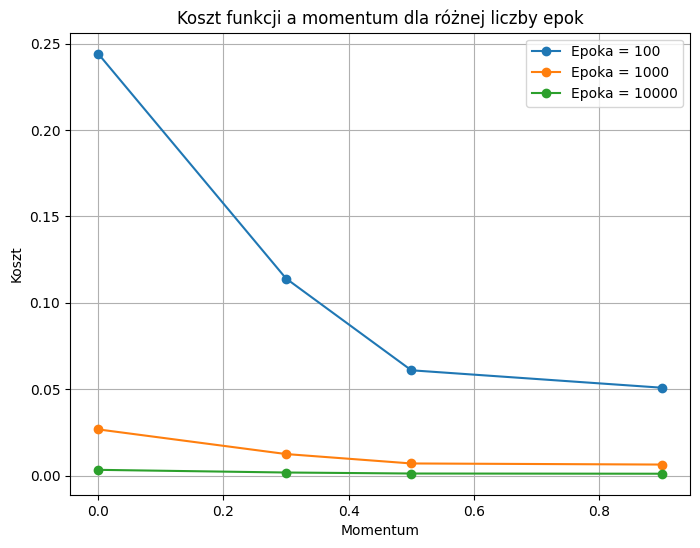

In [65]:
cost_per_m(X=X,Y=Y, lr=lr, input_layer=16, hidden_layer=10, output_layer=2)

In [66]:
list_momentum = [0.0, 0.3, 0.5, 0.9]
tab0, err0 = kfold_func(X, Y, MLP_momentum, num_epoch, lr, list_momentum[0], INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)
tab1, err1 = kfold_func(X, Y, MLP_momentum, num_epoch, lr, list_momentum[1], INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)
tab2, err2 = kfold_func(X, Y, MLP_momentum, num_epoch, lr, list_momentum[2], INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)
tab3, err3 = kfold_func(X, Y, MLP_momentum, num_epoch, lr, list_momentum[3], INPUT_LAYER, HIDDEN_LAYER, OUTPUT_LAYER, HIDDEN_LAYER2)


dic_m = {'0.0': tab0, '0.3': tab1, '0.5':tab2, '0.9':tab3}
df_err_m = pd.DataFrame(dic_m)
df_err_m.loc[5] = [err0, err1, err2, err3]
df_err_m

,0.0,0.3,0.5,0.9
0,0.000522,0.000465,0.000445,0.000387
1,0.000556,0.000503,0.000484,0.000406
2,0.000497,0.000457,0.000439,0.000380
3,0.000522,0.000469,0.000451,0.000385
4,0.000528,0.000469,0.000454,0.000395
5,0.000525,0.000473,0.000455,0.000391


In [67]:
momentum = 0.9

# Funkcje aktywacji 

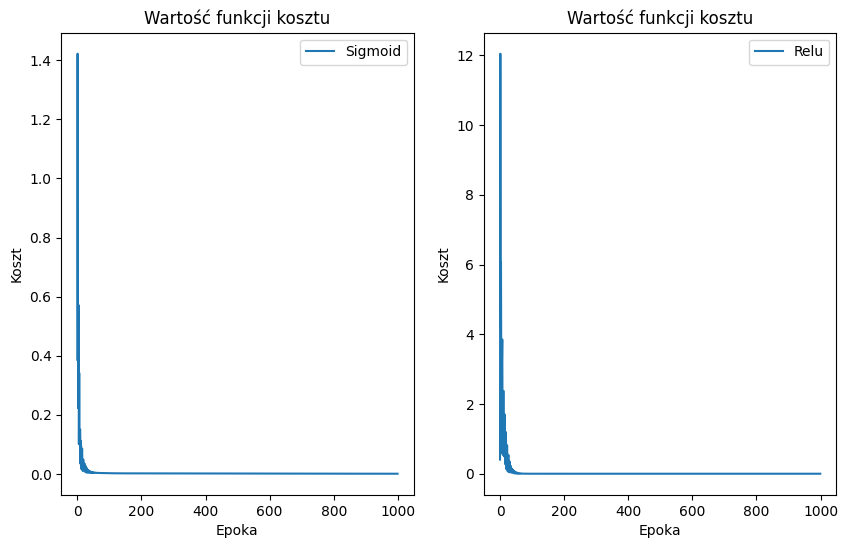

Średni koszt po wszystkich epokach: 0.006340688200203722
Ostatni koszt: 0.0008143269001520867
Średni koszt po wszystkich epokach: 0.05570483315510474
Ostatni koszt: 0.004225800376968005


(None, None)

In [68]:
check_func_act(X=X,Y=Y, lr=lr, m=momentum, input_layer=INPUT_LAYER, hidden_layer=HIDDEN_LAYER, output_layer=OUTPUT_LAYER)

# Warunek Stopu

Early stopping at epoch 23 - Best Train Loss: 0.0102
Early stopping at epoch 47 - Best Train Loss: 0.0043


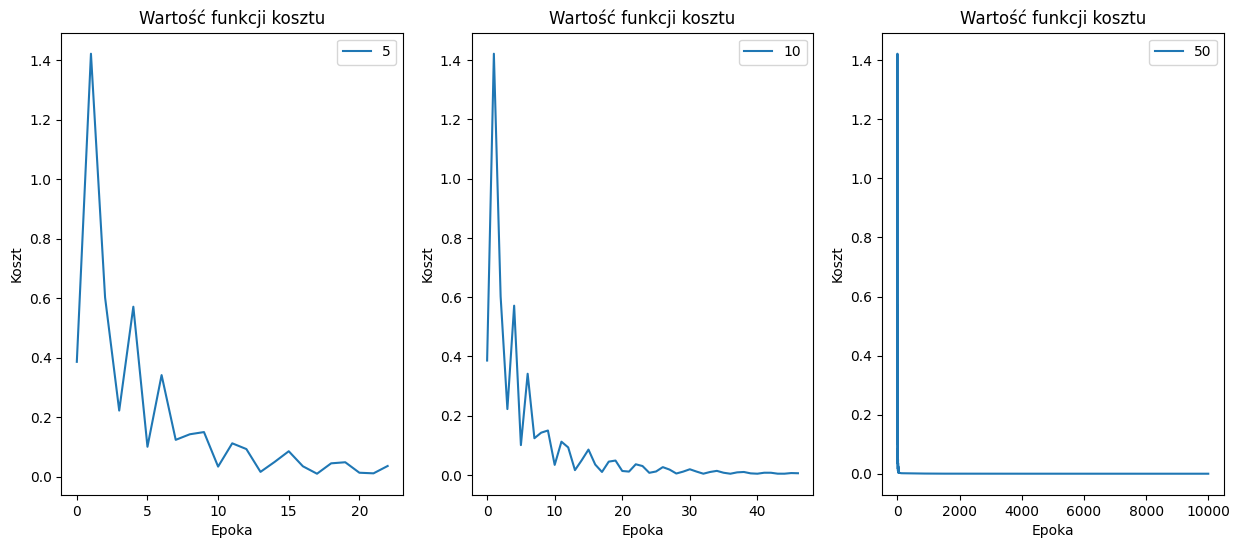

Średni koszt po wszystkich epokach: 0.2024516813817938
Ostatni koszt: 0.036171943893651186
Średni koszt po wszystkich epokach: 0.104333574315995
Ostatni koszt: 0.0059391214460272415
Średni koszt po wszystkich epokach: 0.0010378968254335724
Ostatni koszt: 0.000378623262669399


(None, None, None)

In [69]:
check_stop(X=X,Y=Y, lr=lr, m=momentum, input_layer=INPUT_LAYER, hidden_layer=HIDDEN_LAYER, output_layer=OUTPUT_LAYER)

# Symulacja

Testing: lr=0.01, momentum=0.0
Testing: lr=0.01, momentum=0.5
Testing: lr=0.01, momentum=0.9
Testing: lr=0.1, momentum=0.0
Testing: lr=0.1, momentum=0.5
Testing: lr=0.1, momentum=0.9
Testing: lr=0.3, momentum=0.0
Testing: lr=0.3, momentum=0.5
Testing: lr=0.3, momentum=0.9
Testing: lr=0.5, momentum=0.0
Testing: lr=0.5, momentum=0.5
Testing: lr=0.5, momentum=0.9


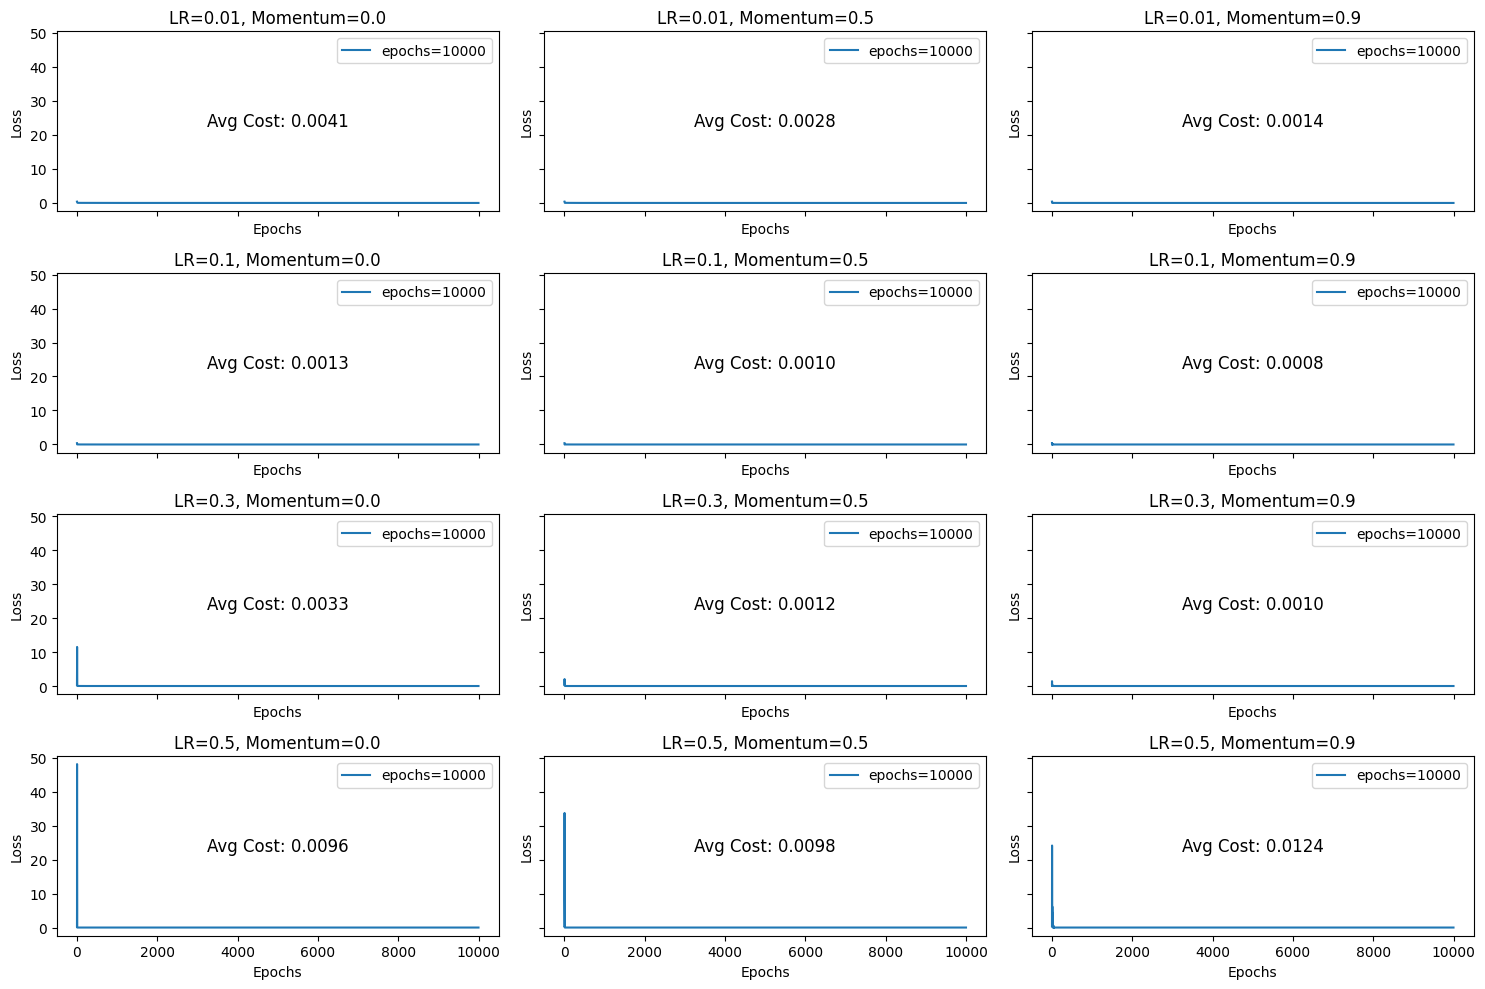

[]

In [70]:
run_simulation(X=X,Y=Y, input_layer=INPUT_LAYER, hidden_layer=HIDDEN_LAYER, output_layer=OUTPUT_LAYER)

# Ostetczne paramtery 

In [71]:
num_epoch = 10000
lr = 0.3
momentum = 0.9 
patience = 50
INPUT_LAYER = 16
HIDDEN_LAYER = 10
OUTPUT_LAYER = 2

# Trening sieci 

Podział na zbiory testowe i treingowe

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [73]:
mlp = MLP_momentum(num_epoch=num_epoch, learning_rate=lr, momentum=momentum, input_layer=INPUT_LAYER,
                 hidden_layer=HIDDEN_LAYER, output_layer=OUTPUT_LAYER, patience=patience)
mlp.train(X_train, y_train)

c:\Users\aleks\OneDrive\Documents\sztuczna_lab\signals\mlp.py:182: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


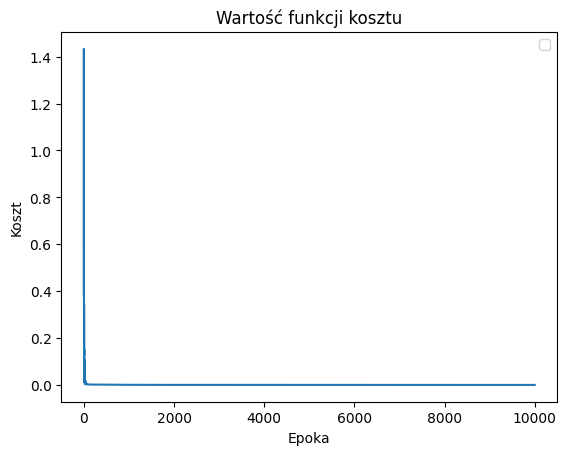

In [74]:
mlp.plot_cost_func()

In [75]:
mlp.avg_cost()

Średni koszt po wszystkich epokach: 0.0010421057658465663
Ostatni koszt: 0.0003790585413636214


# Testowanie sieci 


In [76]:
predictions = mlp.predict(X_test)

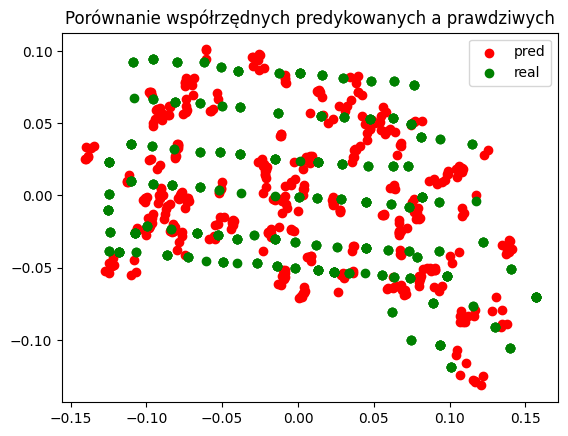

In [77]:
plt.scatter(predictions[:, 0], predictions[:, 1], marker='o', color='red', linewidths=1, label='pred')
plt.scatter(y_test[:, 0], y_test[:, 1], marker='o', color='green', linewidths=1, label='real')
plt.title('Porównanie współrzędnych predykowanych a prawdziwych')
plt.legend()

In [78]:
mlp.cost(y_test, predictions) # średni koszt 

0.000397423409575121

In [79]:
result_df = pd.DataFrame(np.hstack((predictions, y_test)), columns=['Pred_Class1', 'Pred_Class2', 'True_Class1', 'True_Class2'])
result_df

,Pred_Class1,Pred_Class2,True_Class1,True_Class2
0,-0.081933,-0.021093,-0.118275,-0.039323
1,-0.076356,-0.025354,-0.083795,-0.023487
2,-0.121679,-0.043473,-0.125053,-0.010289
3,-0.092085,-0.005307,-0.095878,0.008187
4,-0.060880,0.101076,-0.061692,0.092123
...,...,...,...,...
427,-0.009829,-0.002242,0.011982,-0.034572
428,-0.094342,0.052601,-0.064639,0.030359
429,-0.081423,-0.024887,-0.118275,-0.039323
430,-0.042999,-0.017048,-0.049168,-0.046186
